In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.6f}'.format  

# 그래프에서 한글 깨짐 방지
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')

In [47]:
df_origin = pd.read_csv('./datasets/원본data.csv',index_col=0)
df=pd.read_csv('./datasets/원본data.csv',index_col=0)


In [48]:
df.drop(['유가','은','원위안','외환보유액'],axis=1,inplace=True)

In [49]:
df.drop('구리',axis=1,inplace=True)

In [50]:
df.columns

Index(['재고순환지표', '경제심리지수', '기계류내수출', '건설수주액', '수출입물가비율', '코스피', '장단기',
       '뉴스심리지수', '원달러', '원엔', 'CD', 'G20', '미장단기', '거래량', '천연가스', '금', '종가'],
      dtype='object')

In [52]:
## 경제심리지수, 기계류내수출,수출입물가비율 ,장단기금리차, 외환보유액, 뉴스심리지수, 원달러,G20, 천연가스--> 정상적이다

## G7. G20은 비슷하므로 G7 drop
#df2=df2.drop('G7',axis=1)

df['재고순환지표']+=25
df['재고순환지표']=np.log1p(df['재고순환지표']/df['재고순환지표'].shift(1))
df['건설수주액']=np.log1p(df['건설수주액']/df['건설수주액'].shift(1))
df['코스피']=np.log1p(df['코스피']/df['코스피'].shift(1))
df['원엔']=np.log1p(df['원엔']/df['원엔'].shift(1))
# df['원위안']=np.log1p(df['원위안']/df['원위안'].shift(1))
df['CD']=np.log1p(df['CD']/df['CD'].shift(1))
# df['유가']=np.log1p(df['유가']/df['유가'].shift(1))
df['미장단기']+=0.9
df['미장단기']=np.log1p(df['미장단기']/df['미장단기'].shift(1))
df['거래량']=np.log1p(df['거래량']/df['거래량'].shift(1))
# df['구리']=np.log1p(df['구리']/df['구리'].shift(1))
# df['은']=np.log1p(df['은']/df['은'].shift(1))
df['금']=np.log1p(df['금']/df['금'].shift(1))

df['원달러'] /=1000
df['경제심리지수'] /=100
df['기계류내수출'] /=100
df['수출입물가비율'] /=100
df['뉴스심리지수'] /=100
df['G20']/=100

df['천연가스']/=10

df['종가']=np.log(df['종가']/df['종가'].shift(1))
df=df.dropna(axis=0)


In [53]:
np.isinf(df).sum()

재고순환지표     0
경제심리지수     0
기계류내수출     0
건설수주액      0
수출입물가비율    0
코스피        0
장단기        0
뉴스심리지수     0
원달러        0
원엔         0
CD         0
G20        0
미장단기       0
거래량        0
천연가스       0
금          0
종가         0
dtype: int64

In [54]:
### H0가 비정상(non-stationary)이다
### 유의수준보다 p-value가 작으면 기각 --> 정상적 데이터다

from statsmodels.tsa.stattools import adfuller
import pandas as pd
pd.options.display.float_format = '{:.6f}'.format

adf_df = pd.DataFrame()  # 빈 데이터프레임 생성

for i in df.columns:
    adf_sample = adfuller(df[i], autolag='AIC')
    
    adf_result = pd.Series(adf_sample[:4], index=['stat', 'p_value', 'lag', 'observ'])
    sig_level = adf_sample[4]['5%']
    adf_result['5%'] = sig_level
    
    adf_df[i] = adf_result  # 결과를 데이터프레임에 열(column)로 추가

adf_df = adf_df.transpose()  # 행(row)과 열(column)을 전환하여 변환
adf_df

,stat,p_value,lag,observ,5%
재고순환지표,-7.304759,0.000000,3.000000,179.000000,-2.877826
경제심리지수,-3.325043,0.013795,11.000000,171.000000,-2.878595
기계류내수출,-3.823751,0.002673,11.000000,171.000000,-2.878595
건설수주액,-3.364965,0.012213,12.000000,170.000000,-2.878696
수출입물가비율,-3.070182,0.028840,13.000000,169.000000,-2.878799
코스피,-4.450479,0.000241,12.000000,170.000000,-2.878696
장단기,-3.516219,0.007580,13.000000,169.000000,-2.878799
뉴스심리지수,-5.616294,0.000001,12.000000,170.000000,-2.878696
원달러,-3.601805,0.005727,0.000000,182.000000,-2.877555
원엔,-6.256354,0.000000,4.000000,178.000000,-2.877918


In [56]:
from statsmodels.tsa.stattools import grangercausalitytests
#워닝 메시지
import warnings
warnings.filterwarnings('ignore')

#df.replace(',', '', regex=True, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce') # numeric 변환
maxlag= 6
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=True):

    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            # if verbose:print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            min_p_value_index = np.argmin(p_values)
            df.loc[r, c] = min_p_value
            # print(r,c)
            # print(f'Minimum P-value Index: {min_p_value_index} (Lag: {min_p_value_index + 1})')
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df
df_granger=grangers_causation_matrix(df, variables = df.columns)
#df.to_csv('granger검정.csv')
df_granger

,재고순환지표_x,경제심리지수_x,기계류내수출_x,건설수주액_x,수출입물가비율_x,코스피_x,장단기_x,뉴스심리지수_x,원달러_x,원엔_x,CD_x,G20_x,미장단기_x,거래량_x,천연가스_x,금_x,종가_x
재고순환지표_y,1.000000,0.000000,0.014100,0.042800,0.000000,0.000000,0.000000,0.001300,0.000000,0.000000,0.000000,0.015800,0.008600,0.000000,0.143800,0.000000,0.000100
경제심리지수_y,0.000200,1.000000,0.186400,0.106500,0.000300,0.000000,0.000000,0.000000,0.070000,0.000000,0.304000,0.000000,0.290300,0.000200,0.002500,0.022600,0.000000
기계류내수출_y,0.215400,0.001000,1.000000,0.560300,0.016300,0.005200,0.001300,0.000000,0.097500,0.004600,0.071800,0.007900,0.058400,0.173100,0.088700,0.068500,0.000200
건설수주액_y,0.141600,0.248700,0.082800,1.000000,0.188700,0.505100,0.016200,0.472600,0.272300,0.089400,0.368200,0.139000,0.304500,0.390200,0.030200,0.115700,0.489700
수출입물가비율_y,0.019000,0.000000,0.015100,0.054100,1.000000,0.000000,0.000000,0.000000,0.008900,0.003900,0.006900,0.000000,0.431000,0.265600,0.069000,0.037400,0.000000
코스피_y,0.001200,0.000100,0.149900,0.085100,0.000000,1.000000,0.000400,0.000000,0.000100,0.091500,0.010300,0.000000,0.005000,0.233100,0.005800,0.269400,0.000000
장단기_y,0.000000,0.000000,0.000000,0.001700,0.000000,0.004700,1.000000,0.088900,0.002200,0.001000,0.000000,0.000000,0.000000,0.095400,0.005500,0.009400,0.003900
뉴스심리지수_y,0.256600,0.029500,0.450700,0.261300,0.000400,0.199700,0.072000,1.000000,0.024700,0.819200,0.056400,0.001100,0.243600,0.410600,0.002300,0.006700,0.836800
원달러_y,0.000000,0.007200,0.191400,0.201500,0.095100,0.000000,0.000000,0.000000,1.000000,0.018400,0.024200,0.003200,0.081300,0.059900,0.000000,0.373100,0.002800
원엔_y,0.000000,0.003300,0.280300,0.023200,0.006900,0.000100,0.081200,0.000000,0.037700,1.000000,0.095100,0.109200,0.496100,0.127000,0.000200,0.055300,0.485300


In [57]:
df.columns

Index(['재고순환지표', '경제심리지수', '기계류내수출', '건설수주액', '수출입물가비율', '코스피', '장단기',
       '뉴스심리지수', '원달러', '원엔', 'CD', 'G20', '미장단기', '거래량', '천연가스', '금', '종가'],
      dtype='object')

- 재고순환지표 경제심리지수 수출입물가비율 코스피 장단기 원달러 CD G20

In [58]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

model_var = VAR(endog=df[['재고순환지표','경제심리지수','수출입물가비율','코스피','장단기','원달러','CD','G20','종가']])            
res = model_var.select_order(6)            
res.summary()

,AIC,BIC,FPE,HQIC
0,-49.98,-49.82,1.973e-22,-49.91
1,-64.96,-63.35,6.120e-29,-64.31
2,-67.32,-64.25*,5.829e-30,-66.08*
3,-67.76,-63.24,3.809e-30,-65.93
4,-67.92,-61.95,3.359e-30,-65.50
5,-68.23*,-60.80,2.600e-30*,-65.22
6,-68.19,-59.31,2.932e-30,-64.59


In [59]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

# train 데이터 프레임 정의
train_data = df.iloc[:147][['재고순환지표','경제심리지수','수출입물가비율','코스피','장단기','원달러','CD','G20','종가']]
train = pd.DataFrame(train_data)
                           
# test 데이터 프레임 정의
test_data = df.iloc[147:][['재고순환지표','경제심리지수','수출입물가비율','코스피','장단기','원달러','CD','G20','종가']]
test = pd.DataFrame(test_data)
print(len(train),len(test))

# Initialize empty DataFrame to store predictions
pred = pd.DataFrame(columns=train.columns)

for t in range(len(test)):
    # Fit VAR model with constant
    model_var = VAR(endog=train)
    model_fit = model_var.fit(maxlags=2, ic='hqic', trend='c')

    # One step forecast
    forecast = model_fit.forecast(train.values[-2:], steps=1)

    # Append the prediction to pred DataFrame
    pred = pd.concat([pred, pd.DataFrame(forecast, columns=pred.columns)], ignore_index=True)

    # Append the current test observation to train DataFrame for the next training
    train = pd.concat([train, test.iloc[[t]]], ignore_index=True)

pred.reset_index(drop=True, inplace=True)


147 36


In [60]:
pred['date']= test.index
pred=pred.set_index('date')
show=pd.concat([pred['종가'],test['종가']], axis=1, keys=['예측', '실제'])
a=df_origin[148:][['종가']]
show=pd.concat([show,a],axis=1).rename(columns={'종가':'실제종가'})
b=df_origin[147:]['종가'] * np.exp(show['예측'])
b=b.dropna()
show=pd.concat([show,b],axis=1)
show.rename(columns={0 : '예측종가'},inplace=True)
show

,예측,실제,실제종가,예측종가
2020-05,-0.172017,0.116203,1047.710000,882.134581
2020-06,-0.064068,0.098670,1156.360000,1084.598105
2020-07,0.131732,-0.033584,1118.170000,1275.611035
2020-08,0.016786,0.081749,1213.420000,1233.959921
2020-09,0.051659,0.160504,1424.680000,1500.211939
2020-10,-0.109003,0.030546,1468.870000,1317.176433
2020-11,-0.058545,-0.035161,1418.120000,1337.479199
2020-12,0.028292,0.096859,1562.350000,1607.183327
2021-01,0.089120,0.102901,1731.680000,1893.093402
2021-02,0.064963,0.124357,1960.990000,2092.611453


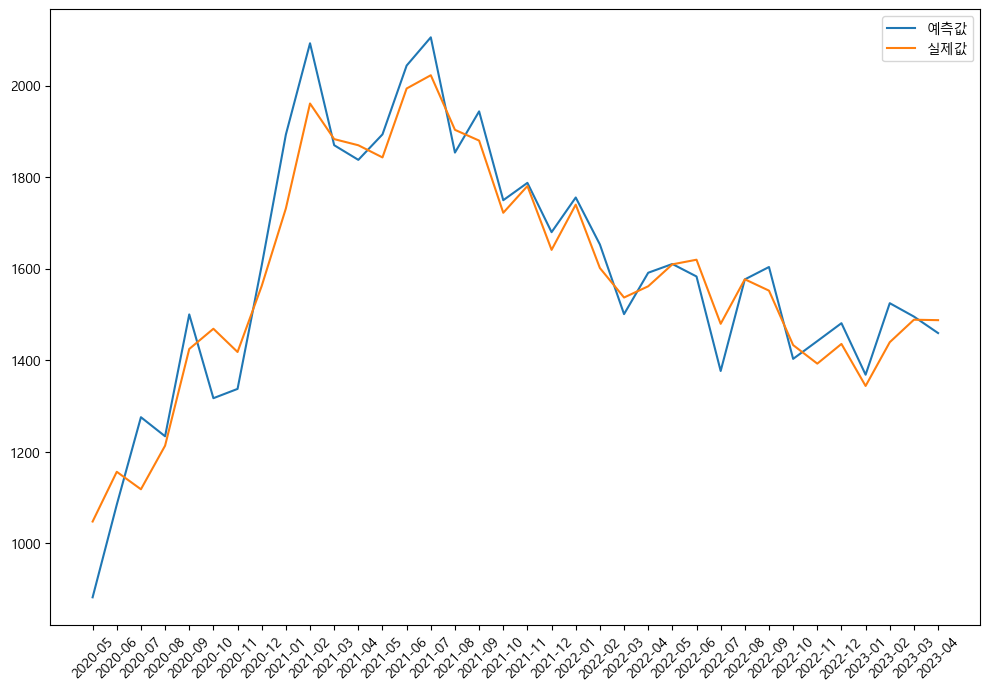

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

plt.plot(show.index, show['예측종가'],label='예측값')
plt.plot(show.index, show['실제종가'],label='실제값')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [62]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#Calculate mean absolute error
mae = mean_absolute_error(show['실제종가'],show['예측종가'])
print('MAE: %f' % mae)

#Calculate mean squared error and root mean squared error
mse = mean_squared_error(show['실제종가'], show['예측종가'])
print('MSE: %f' % mse) 
rmse = np.sqrt(mse)
print('RMSE: %f' % rmse)

MAE: 57.527033
MSE: 5392.893311
RMSE: 73.436321
